<a href="https://www.kaggle.com/code/ibrahimhelal/goodreads-books-analytics?scriptVersionId=123266162" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 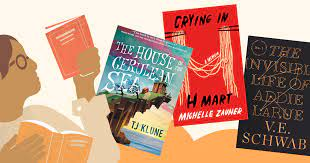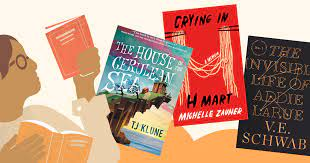

# Goodreads Books Dataset Analytics

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
books = pd.read_csv('/content/books.csv', encoding= 'unicode_escape')

FileNotFoundError: [Errno 2] No such file or directory: '/content/books.csv'

In [ ]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPr?©,4.56,439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPr?©,4.49,439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPr?©,4.47,439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPr?©,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 13713 entries, 0 to 13712

Data columns (total 10 columns):

 #   Column              Non-Null Count  Dtype  

---  ------              --------------  -----  

 0   bookID              13713 non-null  int64  

 1   title               13713 non-null  object 

 2   authors             13713 non-null  object 

 3   average_rating      13713 non-null  float64

 4   isbn                13713 non-null  object 

 5   isbn13              13713 non-null  int64  

 6   language_code       13713 non-null  object 

 7   # num_pages         13713 non-null  int64  

 8   ratings_count       13713 non-null  int64  

 9   text_reviews_count  13713 non-null  int64  

dtypes: float64(1), int64(5), object(4)

memory usage: 1.0+ MB


In [ ]:
books.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13713.000000,13713.000000,1.371300e+04,13713.000000,1.371300e+04,13713.000000
mean,22160.583898,3.930616,9.764016e+12,342.413695,1.776646e+04,533.647561
std,13701.163543,0.357906,3.987825e+11,252.656112,1.129613e+05,2529.098262
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.000000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21322.000000,3.960000,9.780613e+12,301.000000,6.300000e+02,40.000000
75%,33313.000000,4.130000,9.780940e+12,421.000000,4.743000e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


In [ ]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

# Cleaning Dataset

In [ ]:
books['title'].unique()

array(['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
       'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
       "Harry Potter and the Sorcerer's Stone (Harry Potter  #1)", ...,
       'InterWorld (InterWorld  #1)', "The Faeries' Oracle",
       'The World of The Dark Crystal'], dtype=object)

In [ ]:
books['title'].nunique()

12422

# Finding The Outliers

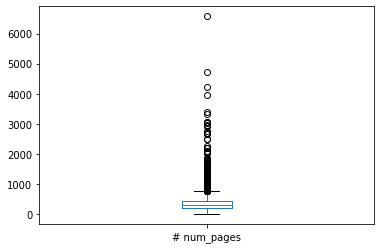

In [ ]:
books.plot(x= 'title', y= '# num_pages', kind = 'box')

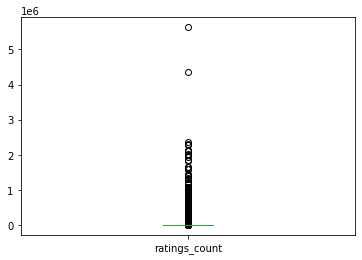

In [ ]:
books.plot(x= 'title', y= 'ratings_count', kind = 'box')

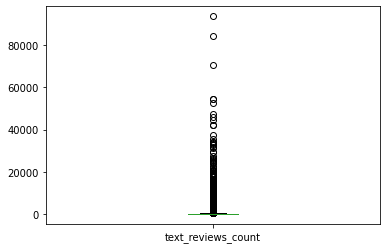

In [ ]:
books.plot(x= 'title', y= 'text_reviews_count', kind = 'box')

**What are the important books?
The books with 4 stars and more.**

In [ ]:
imp_books =books[(books['average_rating']>=4) & (books['# num_pages']>=400) ].loc[:,['title','authors','language_code','average_rating','# num_pages','ratings_count','text_reviews_count']]
imp_books

,title,authors,language_code,average_rating,# num_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPr?©,eng,4.56,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPr?©,eng,4.49,870,1996446,27613
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPr?©,eng,4.55,435,2149872,33964
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPr?©,eng,4.78,2690,38872,154
7,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,eng,4.73,3342,27410,820
...,...,...,...,...,...,...,...
13687,The Abhorsen Trilogy (The Abhorsen Trilogy #1-3),Garth Nix,eng,4.66,777,89,8
13691,The Seventh Tower (The Seventh Tower #1-3),Garth Nix,en-US,4.12,649,61,2
13693,Lirael (Abhorsen #2),Garth Nix,en-CA,4.30,705,3325,351
13697,Rebeca,Daphne du Maurier,spa,4.22,544,67,8


In [ ]:
imp_books.describe().T

,count,mean,std,min,25%,50%,75%,max
average_rating,2172.0,4.207196,0.152916,4.0,4.08,4.18,4.3,5.0
# num_pages,2172.0,668.567219,366.632642,400.0,462.00,564.00,752.0,6576.0
ratings_count,2172.0,23379.956722,119384.826522,0.0,130.75,864.50,6901.5,2149872.0
text_reviews_count,2172.0,682.251381,3112.433756,0.0,9.00,47.00,253.0,84237.0


**The Outlier in the important books**

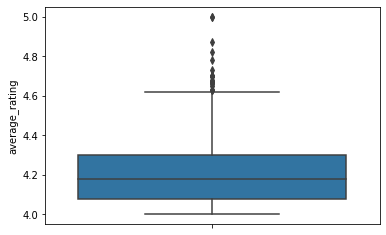

In [ ]:
#OUTLIERS IN RATING
sns.boxplot(y='average_rating',data= imp_books);

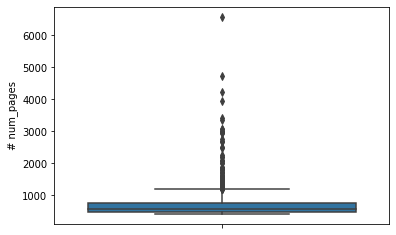

In [ ]:
sns.boxplot(y='# num_pages',data= imp_books);

In [ ]:
big_books = books[(books['# num_pages']>=600) & (books['average_rating']>4)].loc[:,['title','authors','language_code','average_rating','# num_pages','ratings_count','text_reviews_count']]
big_books

,title,authors,language_code,average_rating,# num_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPr?©,eng,4.56,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPr?©,eng,4.49,870,1996446,27613
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPr?©,eng,4.78,2690,38872,154
7,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,eng,4.73,3342,27410,820
8,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,eng,4.38,815,3602,258
...,...,...,...,...,...,...,...
13659,The Chrestomanci Quartet (Chrestomanci #1-4),Diana Wynne Jones,en-US,4.50,664,78,6
13676,The Abhorsen Trilogy Box Set (Abhorsen #1-3),Garth Nix,eng,4.53,850,7626,192
13687,The Abhorsen Trilogy (The Abhorsen Trilogy #1-3),Garth Nix,eng,4.66,777,89,8
13691,The Seventh Tower (The Seventh Tower #1-3),Garth Nix,en-US,4.12,649,61,2


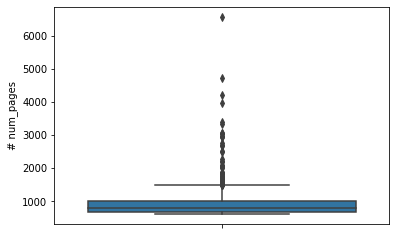

In [ ]:
sns.boxplot(y='# num_pages',data= big_books);

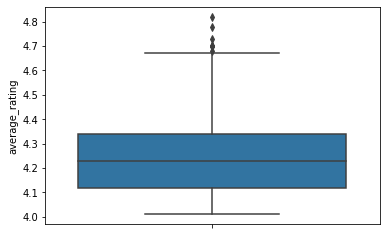

In [ ]:
sns.boxplot(y='average_rating',data= big_books);

**What are the higher rating books?
the books with 4.5 and more stars.**

In [ ]:
big_ratings = books[(books['# num_pages']>=300) & (books['average_rating']>=4.5)].loc[:,['title','authors','language_code','average_rating','# num_pages','ratings_count','text_reviews_count']]
big_ratings

,title,authors,language_code,average_rating,# num_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPr?©,eng,4.56,652,1944099,26249
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPr?©,eng,4.55,435,2149872,33964
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPr?©,eng,4.78,2690,38872,154
7,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,eng,4.73,3342,27410,820
22,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,eng,4.59,1728,97731,1536
...,...,...,...,...,...,...,...
13636,Harry Potter y el prisionero de Azkaban (Harry...,J.K. Rowling,spa,4.55,359,5582,469
13637,Harry Potter et le Prisonnier d'Azkaban (Harry...,J.K. Rowling-Jean-Fran?§ois M?©nard,fre,4.55,349,249,11
13659,The Chrestomanci Quartet (Chrestomanci #1-4),Diana Wynne Jones,en-US,4.50,664,78,6
13676,The Abhorsen Trilogy Box Set (Abhorsen #1-3),Garth Nix,eng,4.53,850,7626,192


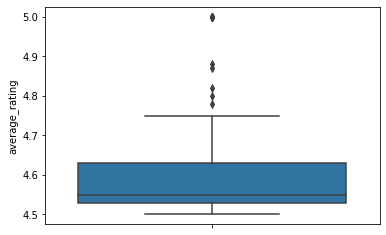

In [ ]:
sns.boxplot(y='average_rating',data= big_ratings);

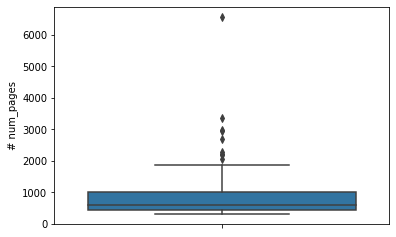

In [ ]:
sns.boxplot(y='# num_pages',data= big_ratings);

**Are there books with 1000 pages and took a high rating?**

In [ ]:
biger_books = books[(books['# num_pages']>=1000) & (books['average_rating']>=4)].loc[:,['title','authors','language_code','average_rating','# num_pages','ratings_count','text_reviews_count']]
biger_books

,title,authors,language_code,average_rating,# num_pages,ratings_count,text_reviews_count
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPr?©,eng,4.78,2690,38872,154
7,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,eng,4.73,3342,27410,820
22,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,eng,4.59,1728,97731,1536
23,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,eng,4.49,1184,1670,91
24,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,eng,4.49,1137,2819,139
...,...,...,...,...,...,...,...
13580,The Norton Anthology of Literature by Women: T...,Sandra M. Gilbert-Susan Gubar,eng,4.12,1470,84,10
13581,The Norton Anthology of Theory and Criticism,Vincent B. Leitch-William E. Cain-Laurie A. Fi...,eng,4.13,2662,1438,60
13582,The Norton Anthology of English Literature Vo...,M.H. Abrams-Stephen Greenblatt-James Noggle-Ja...,eng,4.21,3956,44,0
13624,APA Dictionary of Psychology,American Psychological Association-Gary R. Van...,eng,4.29,1024,29,2


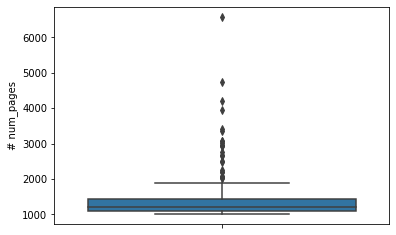

In [ ]:
sns.boxplot(y='# num_pages',data= biger_books);

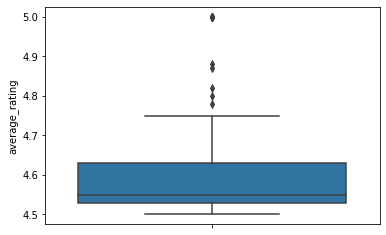

In [ ]:
sns.boxplot(y='average_rating',data= big_ratings);

In [ ]:
bigest_ratings_arr = bigest_ratings.values
bigest_ratings_arr

array([[1, 'Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
        'J.K. Rowling-Mary GrandPr?©', ..., 652, 1944099, 26249],
       [2,
        'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
        'J.K. Rowling-Mary GrandPr?©', ..., 870, 1996446, 27613],
       [3, "Harry Potter and the Sorcerer's Stone (Harry Potter  #1)",
        'J.K. Rowling-Mary GrandPr?©', ..., 320, 5629932, 70390],
       ...,
       [47558, 'The Gashlycrumb Tinies (The Vinegar Works  #1)',
        'Edward Gorey', ..., 32, 46225, 668],
       [47559, 'Amphigorey (Amphigorey  #1)', 'Edward Gorey', ..., 220,
        35332, 343],
       [47624, 'Lirael (Abhorsen  #2)', 'Garth Nix', ..., 464, 87623,
        1828]], dtype=object)

**Who are the authors of the high rating books?**

In [ ]:
authors=imp_books.loc[:,['authors']].drop_duplicates()
authors


,authors
0,J.K. Rowling-Mary GrandPr?©
7,J.K. Rowling
8,Douglas Adams
13,Bill Bryson-William Roberts
22,J.R.R. Tolkien
...,...
13624,American Psychological Association-Gary R. Van...
13641,Stephen King-Cecilia Absatz
13647,Stephen King-Mar?­a Antonieta Menini
13665,Poppy Z. Brite


In [ ]:
no_books_per_author= imp_books['authors'].value_counts()
authors['no_books_per_author']=imp_books['authors'].map(no_books_per_author.to_dict())
authors

,authors,no_books_per_author
0,J.K. Rowling-Mary GrandPr?©,6
7,J.K. Rowling,7
8,Douglas Adams,6
13,Bill Bryson-William Roberts,1
22,J.R.R. Tolkien,21
...,...,...
13624,American Psychological Association-Gary R. Van...,1
13641,Stephen King-Cecilia Absatz,1
13647,Stephen King-Mar?­a Antonieta Menini,1
13665,Poppy Z. Brite,1


In [ ]:
books.duplicated(subset= 'title').sum()

1291

In [ ]:
print('number of duplicated title is')
imp_books.duplicated(subset = 'title').sum()


number of duplicated title is


211

In [ ]:
print('the counts of duplicate for each title are \n')
imp_books['title'].value_counts()

the counts of duplicate for each title are 




One Hundred Years of Solitude                                                                                               10
'Salem's Lot                                                                                                                 9
The Brothers Karamazov                                                                                                       8
Collected Stories                                                                                                            8
Anna Karenina                                                                                                                8
                                                                                                                            ..
El Clan Del Oso Cavernario                                                                                                   1
Cursor's Fury (Codex Alera  #3)                                                                                

#Some Visual

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 139 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.

  font.set_t

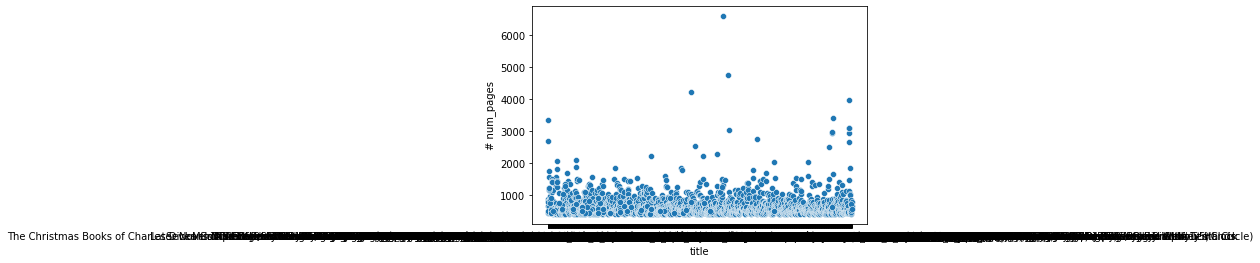

In [ ]:
sns.scatterplot(x='title', y = '# num_pages', data= imp_books);

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 139 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.

  font.set_t

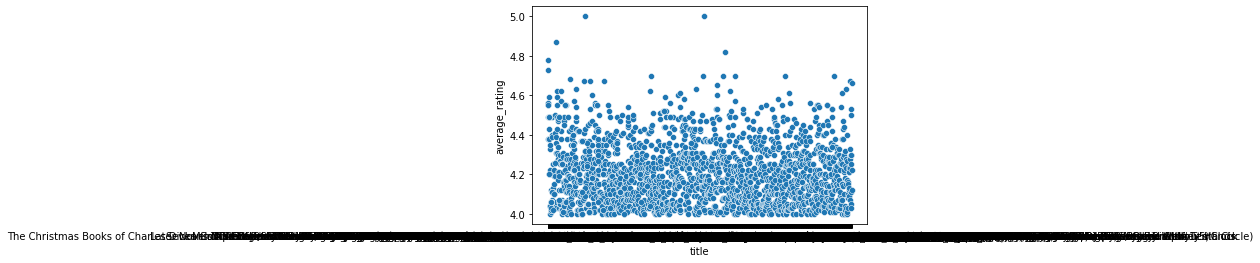

In [ ]:
sns.scatterplot(x='title',y = 'average_rating', data= imp_books);

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 139 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.

  font.set_t

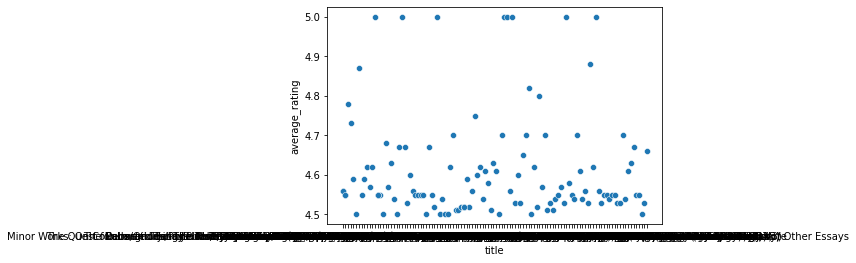

In [ ]:
sns.scatterplot(x='title',y = 'average_rating', data= big_ratings);

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 139 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.

  font.set_t

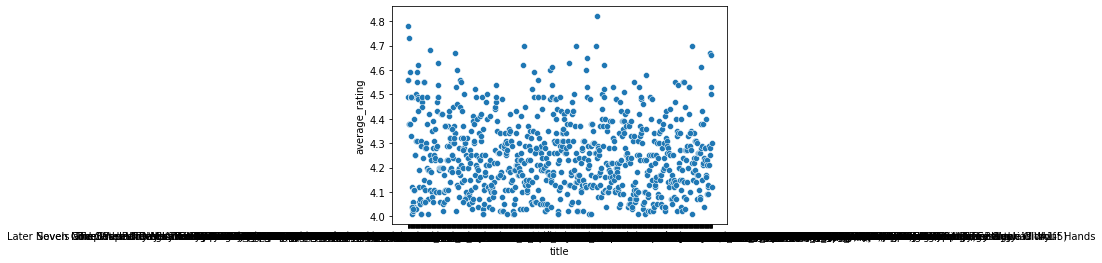

In [ ]:
sns.scatterplot(x='title',y = 'average_rating', data= big_books);

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 139 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.

  font.set_text(s, 0.0, flags=flags)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.

  font.set_t

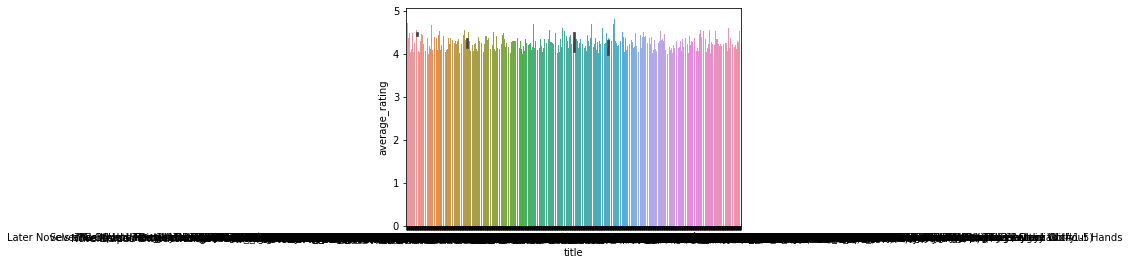

In [ ]:
sns.barplot(x='title',y = 'average_rating', data= big_books);

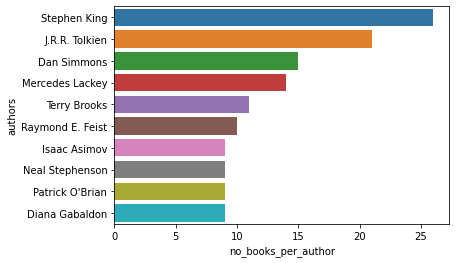

In [ ]:
Top_10_authors=authors.sort_values('no_books_per_author',ascending=False)[:10]
sns.barplot(y='authors',x='no_books_per_author',data=Top_10_authors)

#Preprocessing

In [ ]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

In [ ]:
books['language_code'].value_counts()

eng      10594
en-US     1698
spa        419
en-GB      341
ger        238
fre        209
jpn         64
por         27
mul         21
ita         19
zho         16
grc         12
en-CA        9
nl           7
rus          7
swe          6
glg          4
tur          3
cat          3
lat          3
enm          3
ara          2
nor          1
srp          1
dan          1
ale          1
gla          1
wel          1
msa          1
heb          1
Name: language_code, dtype: int64